In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the data
df = pd.read_csv("../data/synthetic_COPD_data.csv")

# Displaying the first few rows of the dataset
df.head()

,Age,Gender,Smoking_Status,Biomass_Fuel_Exposure,Occupational_Exposure,Family_History_COPD,BMI,Location,Air_Pollution_Level,Respiratory_Infections_Childhood,COPD_Diagnosis
0,31,Male,Former,1,1,1,27.56,Lalitpur,84,0,0
1,60,Male,Never,1,0,0,30.30,Pokhara,131,1,0
2,33,Male,Former,0,0,1,28.45,Pokhara,123,1,0
3,36,Female,Current,1,0,0,27.49,Kathmandu,253,0,1
4,58,Male,Never,0,0,0,25.49,Pokhara,117,1,0


1. Age Feature Transformation

The Age column was previously binned into categories such as 'young', 'adult', 'middle_aged', 'old', and 'too_old'. This transformation helps in capturing non-linear relationships between age groups and the target variable.

In [2]:
# Binning the Age column into categories
bins = [0, 30, 45, 60, 75, 100]
labels = ['young', 'adult', 'middle_aged', 'old', 'too_old']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


2. Creating BMI Category Feature

Instead of using raw BMI values, categorizing them can help in understanding the health risk distribution better. Categories include underweight, normal, overweight, and obese.

In [3]:
# Creating BMI categories
bins_bmi = [0, 18.5, 24.9, 29.9, 100]
labels_bmi = ['underweight', 'normal', 'overweight', 'obese']
df['BMI_category'] = pd.cut(df['BMI'], bins=bins_bmi, labels=labels_bmi, right=False)

3. Encoding Categorical Variables

Using encoding techniques such as Label Encoding or One-Hot Encoding for categorical variables ensures that these features can be used effectively in machine learning models.

In [4]:
df.columns

Index(['Age', 'Gender', 'Smoking_Status', 'Biomass_Fuel_Exposure',
       'Occupational_Exposure', 'Family_History_COPD', 'BMI', 'Location',
       'Air_Pollution_Level', 'Respiratory_Infections_Childhood',
       'COPD_Diagnosis', 'Age_Category', 'BMI_category'],
      dtype='object')

In [5]:
# Encoding categorical variables
# One-hot encoding for variables with more categories
# df = pd.get_dummies(df, columns=['Smoking_Status', 'Location', 'Age_Category', 'BMI_category'], drop_first=True)

# Label encoding for binary categories
df['Biomass_Fuel_Exposure'] = df['Biomass_Fuel_Exposure'].map({'Yes': 1, 'No': 0})
df['Occupational_Exposure'] = df['Occupational_Exposure'].map({'Yes': 1, 'No': 0})
df['Family_History_COPD'] = df['Family_History_COPD'].map({'Yes': 1, 'No': 0})
df['Respiratory_Infections_Childhood'] = df['Respiratory_Infections_Childhood'].map({'Yes': 1, 'No': 0})
df['Gender_encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})


4. Interaction Features

Creating interaction features can help capture combined effects of multiple variables, which might be missed if these variables are considered independently.

In [6]:
df.columns

Index(['Age', 'Gender', 'Smoking_Status', 'Biomass_Fuel_Exposure',
       'Occupational_Exposure', 'Family_History_COPD', 'BMI', 'Location',
       'Air_Pollution_Level', 'Respiratory_Infections_Childhood',
       'COPD_Diagnosis', 'Age_Category', 'BMI_category', 'Gender_encoded'],
      dtype='object')

In [7]:

df['Occupation_Family_History_Interaction'] = df['Occupational_Exposure'] * df['Family_History_COPD']

In [8]:
df.to_csv('../data/final_dataset_after_featureeng2.csv', index=False)

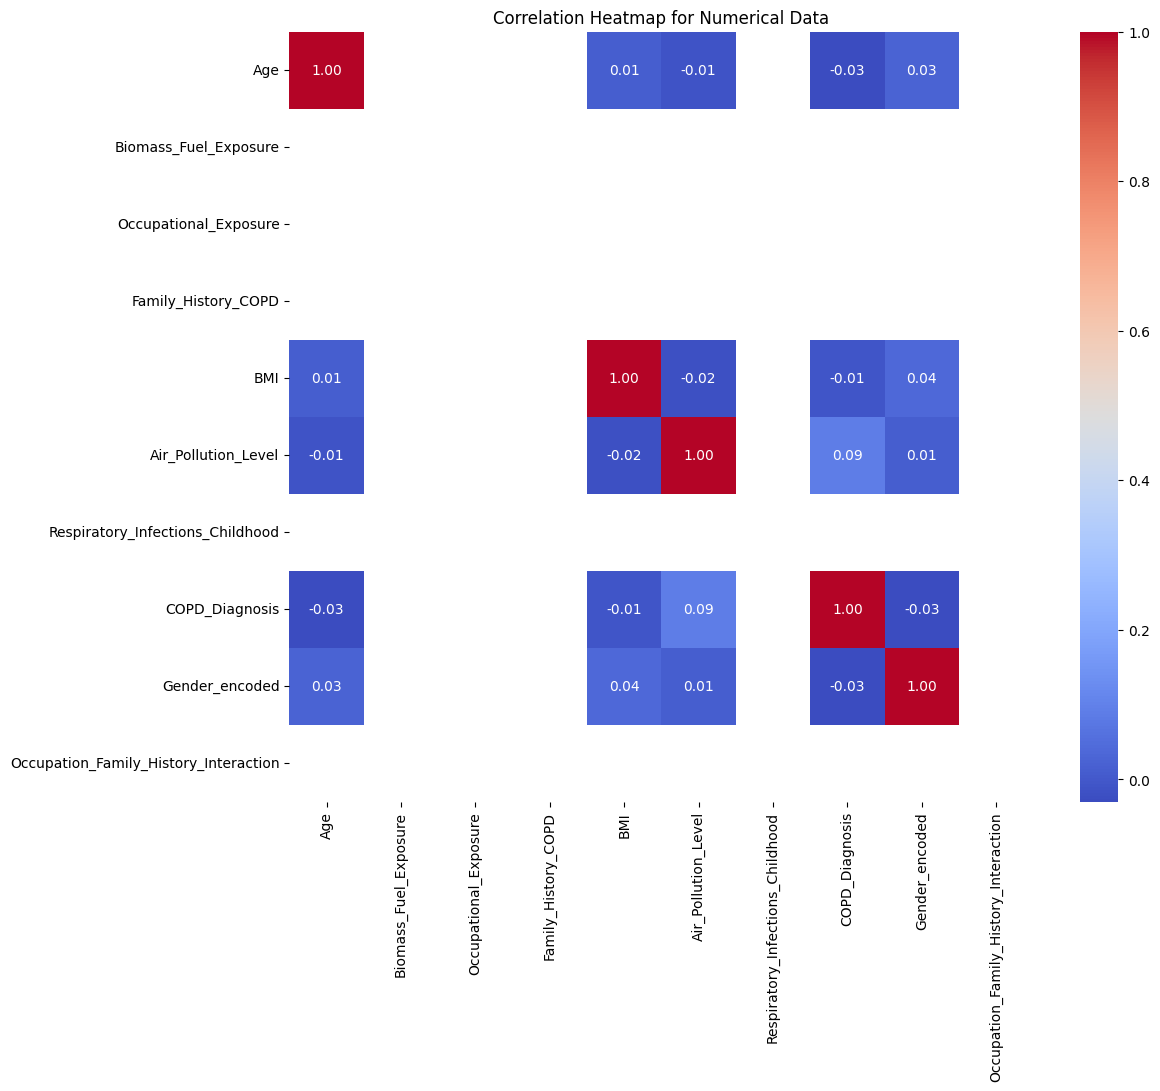

In [9]:
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Correlation Analysis for numerical data
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for Numerical Data")
plt.show()
